In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **Comparing comedy vs drama movies** 

*   how popular are comedy movies compared to drama movies?
*   how is the popularity trend in each of drama and comedy movies throughout the years?
*   how much the profit difference in drama movies to comedy?
*   how many drama and comedy movies released per year ?



# Data Wrangling and Analysis

In [3]:
df=pd.read_csv('tmdb_movies.csv')
df.head(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,124199945.4,4.903142e+08


In [4]:
df.shape


(10866, 21)

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df2=df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'],axis=1)


In [9]:
print(df2.shape)
df2.head(2)


(10866, 14)


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [10]:
df2.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [11]:
df2.dropna(inplace=True)

In [12]:
df_drama=df2[ df2['genres'].isin(['Drama']) ]
df_comedy=df2[ df2['genres'].isin(['Comedy']) ]

In [13]:
df_drama.head(5)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
55,295964,2.584264,20000000,36606743,Burnt,John Wells,100,Drama,10-02-2015,631,6.3,2015,18399991.90,3.367819e+07
58,306819,2.557859,15000000,64191523,The Danish Girl,Tom Hooper,120,Drama,11/27/15,867,7.3,2015,13799993.93,5.905618e+07
68,312221,2.331567,35000000,137935567,Creed,Ryan Coogler,133,Drama,11/25/15,1171,7.3,2015,32199985.83,1.269007e+08
77,321741,2.121884,35000000,48623572,Concussion,Peter Landesman,123,Drama,11-12-2015,500,6.9,2015,32199985.83,4.473367e+07
96,298382,1.823130,11930000,18340000,The Dressmaker,Jocelyn Moorhouse,118,Drama,10-01-2015,197,6.9,2015,10975595.17,1.687279e+07


In [14]:

df_comedy.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
26,214756,4.564549,68000000,215863606,Ted 2,Seth MacFarlane,115,Comedy,6/25/15,1666,6.3,2015,62559972.47,198594430.1
51,257211,2.814802,35000000,194564672,The Intern,Nancy Meyers,121,Comedy,9/24/15,1255,7.1,2015,32199985.83,178999419.5
69,271718,2.317670,35000000,140795793,Trainwreck,Judd Apatow,125,Comedy,7/17/15,849,6.1,2015,32199985.83,129532072.6


In [15]:
print(df_comedy.shape,df_drama.shape)

(707, 14) (711, 14)


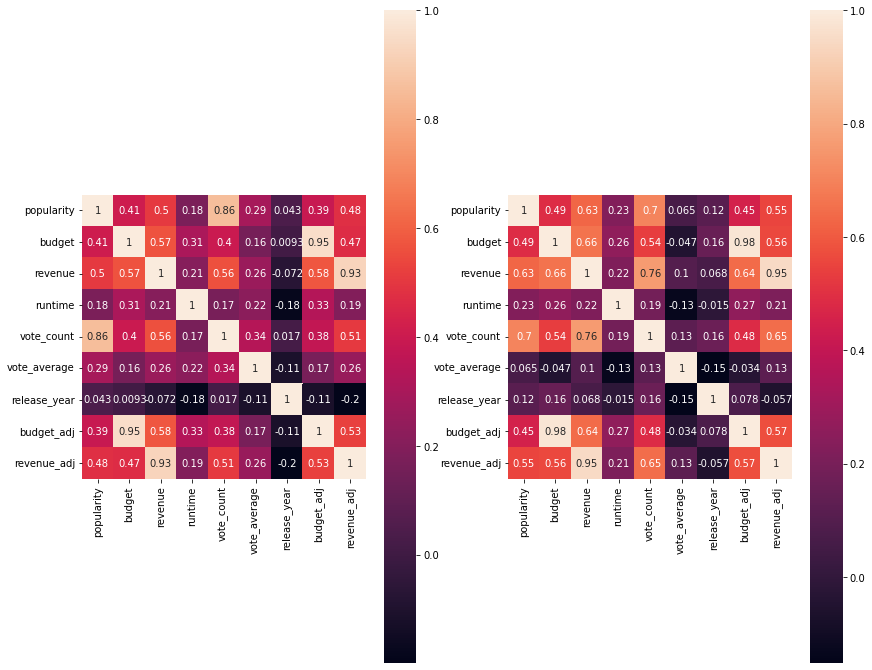

In [16]:

fig,ax=plt.subplots(1,2,figsize = (14,12))

number_col = df2.dtypes[df2.dtypes != 'object'].index[1:]
drama_corr = df_drama[number_col].corr()
comedy_corr= df_comedy[number_col].corr()
sns.heatmap(drama_corr,annot = True,square = True,ax=ax[0],);
sns.heatmap(comedy_corr,annot = True,square = True,ax=ax[1]);

# Question 1:
how popular are comedy movies compared to drama movies?


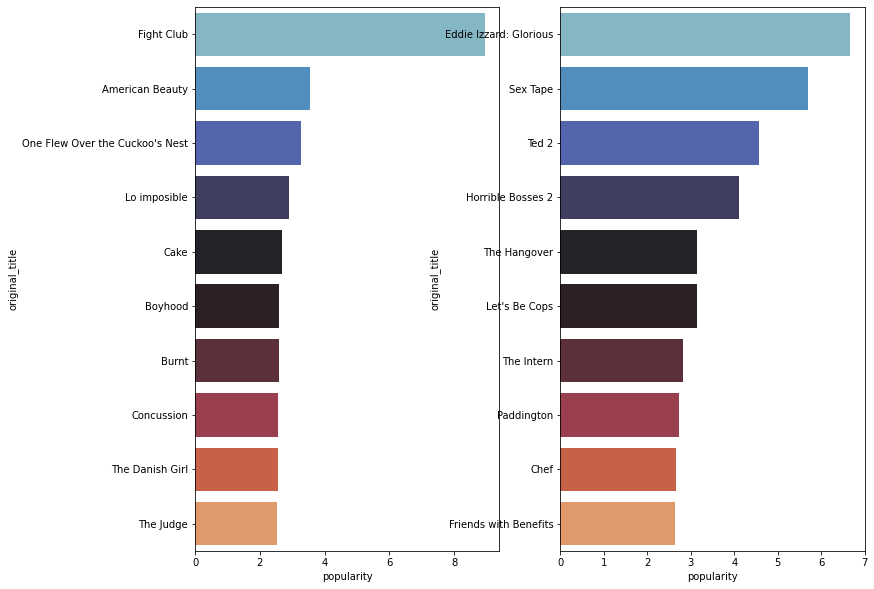

In [17]:
high_pop_drama=df_drama.groupby("original_title", as_index=False)['popularity'].sum().sort_values(by="popularity",ascending=False)
high_pop_comedy=df_comedy.groupby("original_title", as_index=False)['popularity'].sum().sort_values(by="popularity",ascending=False)
fig,ax=plt.subplots(1,2,figsize = (12,10))
sns.barplot(data=high_pop_drama[:10],x="popularity",y="original_title",palette='icefire',ax=ax[0]);
sns.barplot(data=high_pop_comedy[:10],x="popularity",y="original_title",palette='icefire',ax=ax[1]);

In [18]:

df_drama['popularity'].describe()

count    711.000000
mean       0.507554
std        0.579070
min        0.003731
25%        0.201240
50%        0.351379
75%        0.597035
max        8.947905
Name: popularity, dtype: float64

In [19]:
df_comedy['popularity'].describe()

count    707.000000
mean       0.530032
std        0.631135
min        0.000620
25%        0.167949
50%        0.330802
75%        0.646046
max        6.668990
Name: popularity, dtype: float64

# Question 2:
how is the popularity trend in each of drama and comedy movies throughout the years?

Text(0, 0.5, 'Popularity')

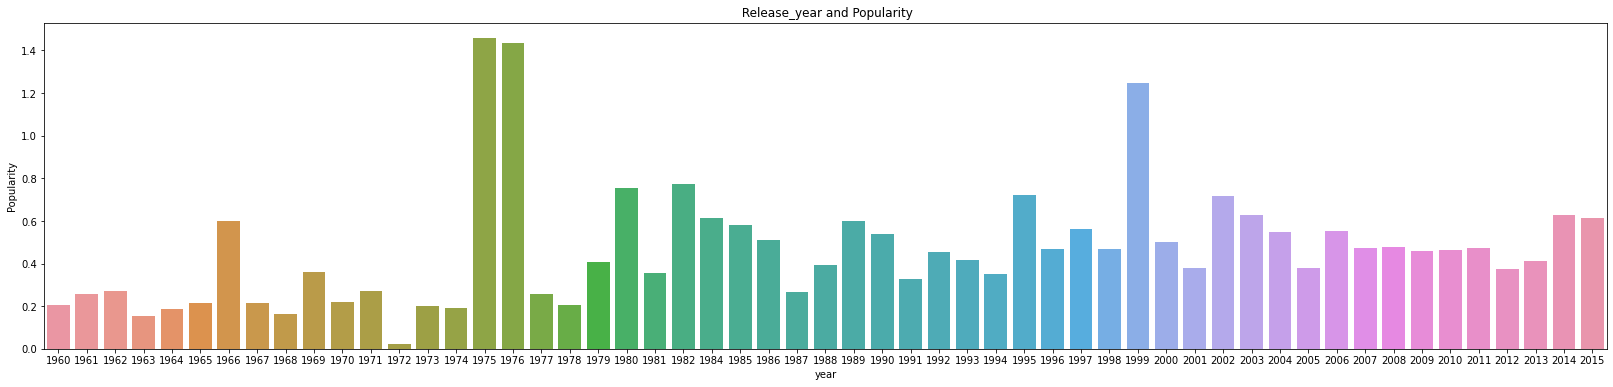

In [20]:

plt.figure(figsize=(28,6))
sns.barplot( x = df_drama['release_year'],y = df_drama['popularity'],ci = None, data=df_drama)
plt.title(' Release_year and Popularity')
plt.xlabel('year')
plt.ylabel('Popularity')

Text(0, 0.5, 'Popularity')

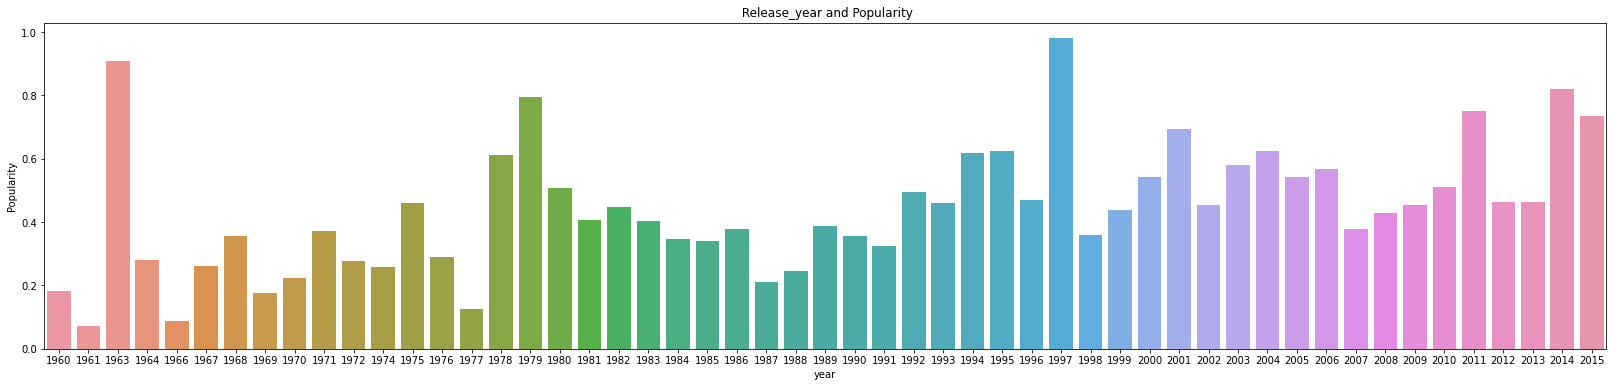

In [21]:
plt.figure(figsize=(28,6))
sns.barplot( x = df_comedy['release_year'],y = df_comedy['popularity'],ci = None, data=df_drama)
plt.title(' Release_year and Popularity')
plt.xlabel('year')
plt.ylabel('Popularity')

# Question 3:
how much the profit difference in drama movies to comedy?


In [22]:
df_drama['profit']=df_drama['revenue'] - df_drama['budget']
df_comedy['profit']=df_comedy['revenue'] - df_comedy['budget']
df_comedy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
26,214756,4.564549,68000000,215863606,Ted 2,Seth MacFarlane,115,Comedy,6/25/15,1666,6.3,2015,62559972.47,1.985944e+08,147863606
51,257211,2.814802,35000000,194564672,The Intern,Nancy Meyers,121,Comedy,9/24/15,1255,7.1,2015,32199985.83,1.789994e+08,159564672
69,271718,2.317670,35000000,140795793,Trainwreck,Judd Apatow,125,Comedy,7/17/15,849,6.1,2015,32199985.83,1.295321e+08,105795793
78,296100,2.096273,25000000,52395996,The Night Before,Jonathan Levine,100,Comedy,11/20/15,363,6.1,2015,22999989.88,4.820430e+07,27395996
91,274167,1.904898,50000000,240360392,Daddy's Home,Sean Anders,96,Comedy,12/25/15,568,5.7,2015,45999979.76,2.211315e+08,190360392


In [23]:
df_comedy['profit'].mean()-df_drama['profit'].mean()

6060631.786926793

In [24]:
df_comedy['profit'].max()-df_drama['profit'].max()

-157628801

In [25]:
df_drama.sort_values('profit',ascending=False)[:6]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7073,615,0.672946,30000000,611899420,The Passion of the Christ,Mel Gibson,127,Drama,2/25/04,457,6.8,2004,34633361.99,706404470.6,581899420
2411,14,3.555720,15000000,356296601,American Beauty,Sam Mendes,122,Drama,9/15/99,1756,7.7,1999,19635792.70,466411079.8,341296601
9454,380,1.459821,25000000,354825435,Rain Man,Barry Levinson,133,Drama,12-11-1988,934,7.4,1988,46097275.58,654259434.4,329825435
8076,568,2.191608,52000000,355237933,Apollo 13,Ron Howard,140,Drama,6/30/95,1002,7.1,1995,74410277.09,508333712.1,303237933
1403,22881,2.367474,29000000,309208309,The Blind Side,John Lee Hancock,129,Drama,11/20/09,1078,7.1,2009,29475612.59,314279459.5,280208309
6091,1374,1.149954,31000000,300473716,Rocky IV,Sylvester Stallone,91,Drama,11/21/85,517,6.6,1985,62842147.62,609110116.7,269473716


In [26]:
df_comedy.sort_values('profit',ascending=False)[:6]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1397,18785,3.153060,35000000,459270619,The Hangover,Todd Phillips,100,Comedy,06-05-2009,4134,7.1,2009,3.557402e+07,466802856.5,424270619
2424,509,1.723850,42000000,363889678,Notting Hill,Roger Michell,124,Comedy,5/13/99,688,6.8,1999,5.498022e+07,476350818.8,321889678
8668,4247,1.815244,19000000,278019771,Scary Movie,Keenen Ivory Wayans,88,Comedy,07-07-2000,681,5.9,2000,2.405955e+07,352054243.6,259019771
5482,109439,1.439458,103000000,362000072,The Hangover Part III,Todd Phillips,100,Comedy,5/23/13,2010,6.0,2013,9.641144e+07,338844141.1,259000072
5248,9427,1.412516,3500000,257850122,The Full Monty,Peter Cattaneo,91,Comedy,8/13/97,163,6.4,1997,4.754611e+06,350279159.5,254350122
690,195589,2.376309,18000000,268157400,Neighbors,Nicholas Stoller,96,Comedy,05-08-2014,1829,6.2,2014,1.657964e+07,246997381.3,250157400


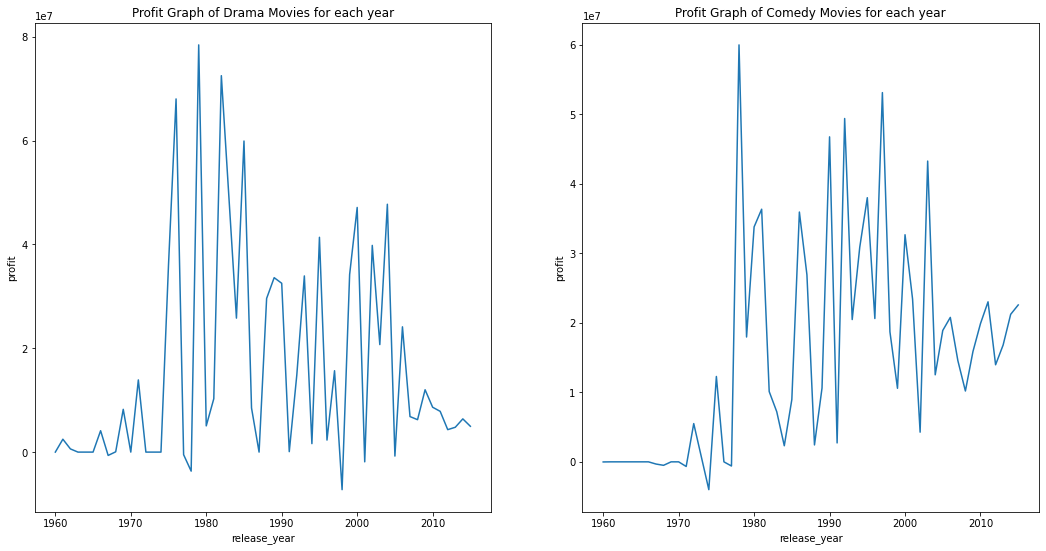

In [27]:
fig,ax=plt.subplots(1,2,figsize = (18,9))
stat=df_drama.groupby('release_year')['profit'].mean()
stat.plot(kind='line',ax=ax[0],ylabel='profit',title='Profit Graph of Drama Movies for each year');
stat2=df_comedy.groupby('release_year')['profit'].mean()
stat2.plot(kind='line',ax=ax[1],ylabel='profit',title='Profit Graph of Comedy Movies for each year');



    

# Question 4: 
how many drama and comedy movies released per year ?


In [28]:
drama_count=df_drama.groupby(['release_year'])['id'].count().sort_values(ascending=False)
drama_count[:]

release_year
2014    72
2013    59
2015    58
2012    58
2010    37
2011    34
2008    33
2006    31
2009    27
2005    24
2007    23
2004    22
1999    17
2000    15
1997    12
1993    11
1988    11
2001    10
1992    10
1985     9
2003     9
1996     8
2002     8
1998     7
1989     7
1987     7
1995     7
1991     6
1994     6
1969     5
1990     4
1971     4
1986     4
1984     4
1981     4
1980     4
1979     4
1962     4
1968     4
1961     3
1978     3
1974     3
1975     3
1977     3
1976     2
1966     2
1965     2
1963     2
1982     2
1960     2
1973     1
1972     1
1970     1
1967     1
1964     1
Name: id, dtype: int64

In [29]:
comedy_count=df_comedy.groupby(['release_year'])['id'].count().sort_values(ascending=False)
comedy_count[:]

release_year
2013    57
2014    50
2009    43
2012    41
2015    36
2007    34
2011    33
2006    30
2010    29
2004    28
2008    28
2005    22
2000    18
1999    18
2003    17
2001    15
1996    15
1997    13
1995    12
1993    12
1989    12
1994    10
1998    10
1983    10
1988     8
1984     8
1987     8
1985     8
2002     7
1986     7
1982     7
1991     6
1981     6
1979     5
1972     4
1990     4
1980     4
1967     3
1968     3
1971     3
1978     3
1975     3
1992     3
1976     2
1970     2
1969     2
1960     2
1974     1
1977     1
1966     1
1964     1
1963     1
1961     1
Name: id, dtype: int64

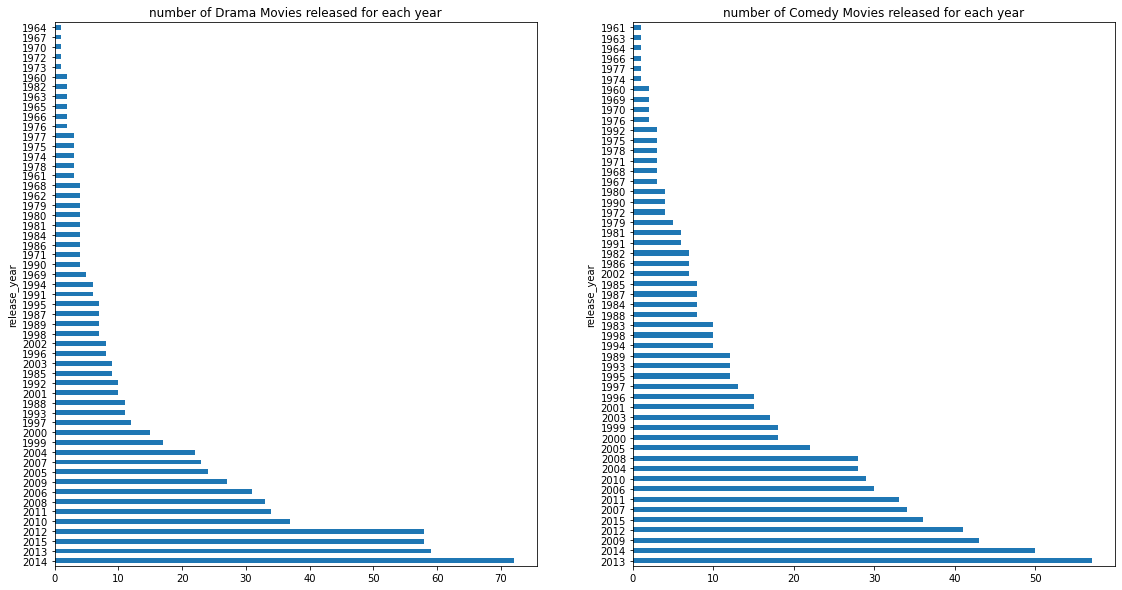

In [30]:
fig,ax=plt.subplots(1,2,figsize = (19,10))
drama_count.plot(kind='barh',ax=ax[0],ylabel='# of Movies',title='number of Drama Movies released for each year');
comedy_count.plot(kind='barh',ax=ax[1],ylabel='# of Movies',title='number of Comedy Movies released for each year');
